<a href="https://colab.research.google.com/github/JozJozmin/Churn-Prediction-ML/blob/main/Churn_Prediction_Updated_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### IMPORTING REQUIRED LIBRARIES FOR PLOTING AND BASIC OPERATIONS
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
### mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##   **Data Preparation and Cleaning** <br>

*   Loading the dataset into pandas dataframe. <br>
*   Checking the info. about data and columns 
*   Fixing the missing & incorrect values.

### 1. Loading the dataset into pandas dataframe

In [ ]:
### Importing both the test and train data
test_df = pd.read_csv('/content/drive/MyDrive/Personal Projects /Churn Prediction improved model /test_lTY72QC.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Personal Projects /Churn Prediction improved model /train_PDjVQMB.csv')

In [ ]:
train_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


### 2. Checking the info. about data and columns

In [ ]:
print(f' The shape of test data is;{test_df.shape}')
print(f' The shape of train data is;{train_df.shape}')

 The shape of test data is;(2851, 10)
 The shape of train data is;(6650, 11)


In [ ]:
train_df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

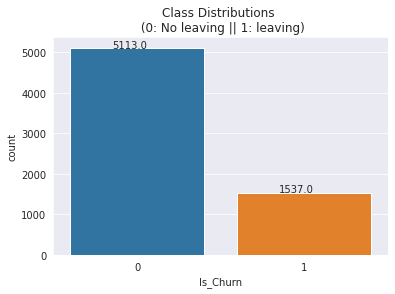

In [ ]:
### checking the quantiy of no.s of zeros and ones in the target column of train_df data

ax = sns.countplot('Is_Churn', data=train_df)
plt.title('Class Distributions \n (0: No leaving || 1: leaving)') 

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show() 

As we can see, this is an imbalanced dataset.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [ ]:
### The column 'ID' is not required for the analysis 
del train_df['ID']
del test_df ['ID']

In [ ]:
#### checking the range of details of each featurs in the given train_data
train_df.describe(include =['int64','float64'])

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [ ]:
train_df.describe(include =['object'])

,Gender,Income,Product_Holdings,Credit_Category
count,6650,6650,6650,6650
unique,2,4,3,3
top,Male,10L - 15L,1,Poor
freq,3612,1885,3200,3076


In [ ]:
### checking the details of test_df
test_df.describe(include =['int64','float64'])

,Age,Balance,Vintage,Transaction_Status,Credit_Card
count,2851.000000,2.851000e+03,2851.000000,2851.000000,2851.000000
mean,41.252192,8.098990e+05,2.220975,0.506840,0.668888
std,9.616756,5.252003e+05,1.489941,0.500041,0.470696
min,21.000000,1.503000e+03,0.000000,0.000000,0.000000
25%,34.000000,4.009684e+05,1.000000,0.000000,0.000000
50%,40.000000,7.659125e+05,2.000000,1.000000,1.000000
75%,47.000000,1.154238e+06,3.000000,1.000000,1.000000
max,72.000000,2.434834e+06,5.000000,1.000000,1.000000


In [ ]:
test_df.describe(include =['object'])

,Gender,Income,Product_Holdings,Credit_Category
count,2851,2851,2851,2851
unique,2,4,3,3
top,Male,10L - 15L,2,Poor
freq,1545,844,1359,1270


### Missing Values

In [ ]:
train_df.isna().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [ ]:
test_df.isna().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

Great! we don't have any missing values in the given dataset

## **Exploratory Analysis and Visualisation**
1. Univariate analysis 
2. Multivariate Analysis 

#### **Univariate Analysis** 

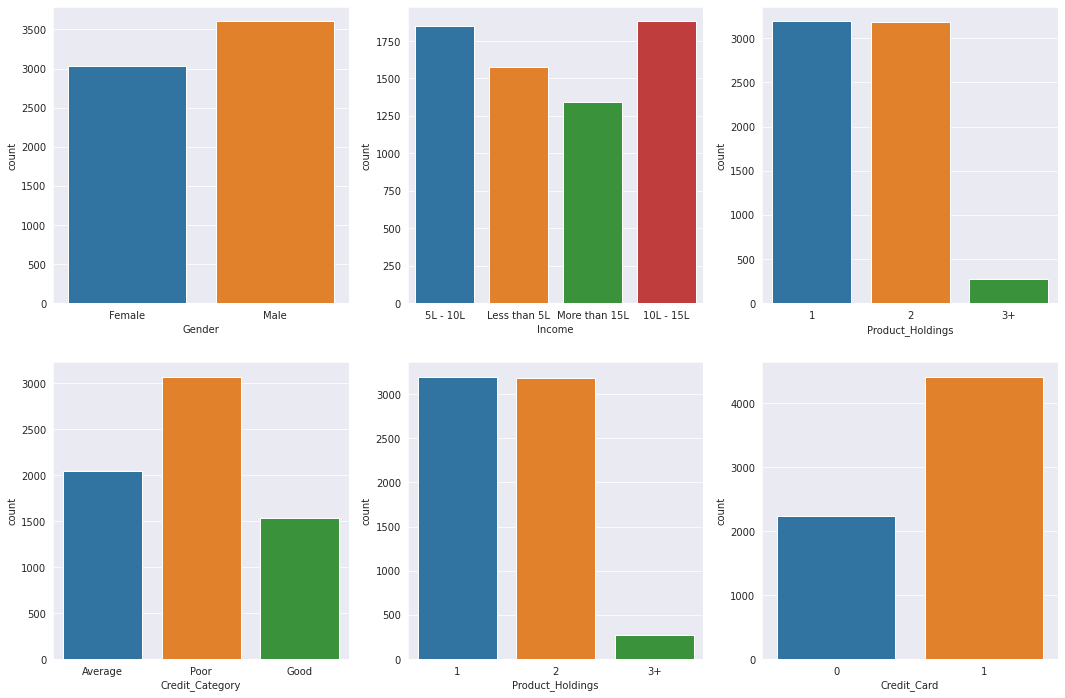

In [ ]:
### plotting the catagorical columns.
fig, axs = plt.subplots(nrows = 2 , ncols = 3,figsize=(18, 12))
sns.countplot(x= 'Gender', data=train_df, ax = axs[0,0])
sns.countplot(x= 'Income', data=train_df, ax = axs[0,1])
sns.countplot(x= 'Product_Holdings', data=train_df, ax = axs[0,2])
sns.countplot(x= 'Credit_Category', data=train_df, ax = axs[1,0])
sns.countplot(x= 'Product_Holdings', data=train_df, ax = axs[1,1])
sns.countplot(x= 'Credit_Card', data=train_df, ax = axs[1,2])
plt.show()

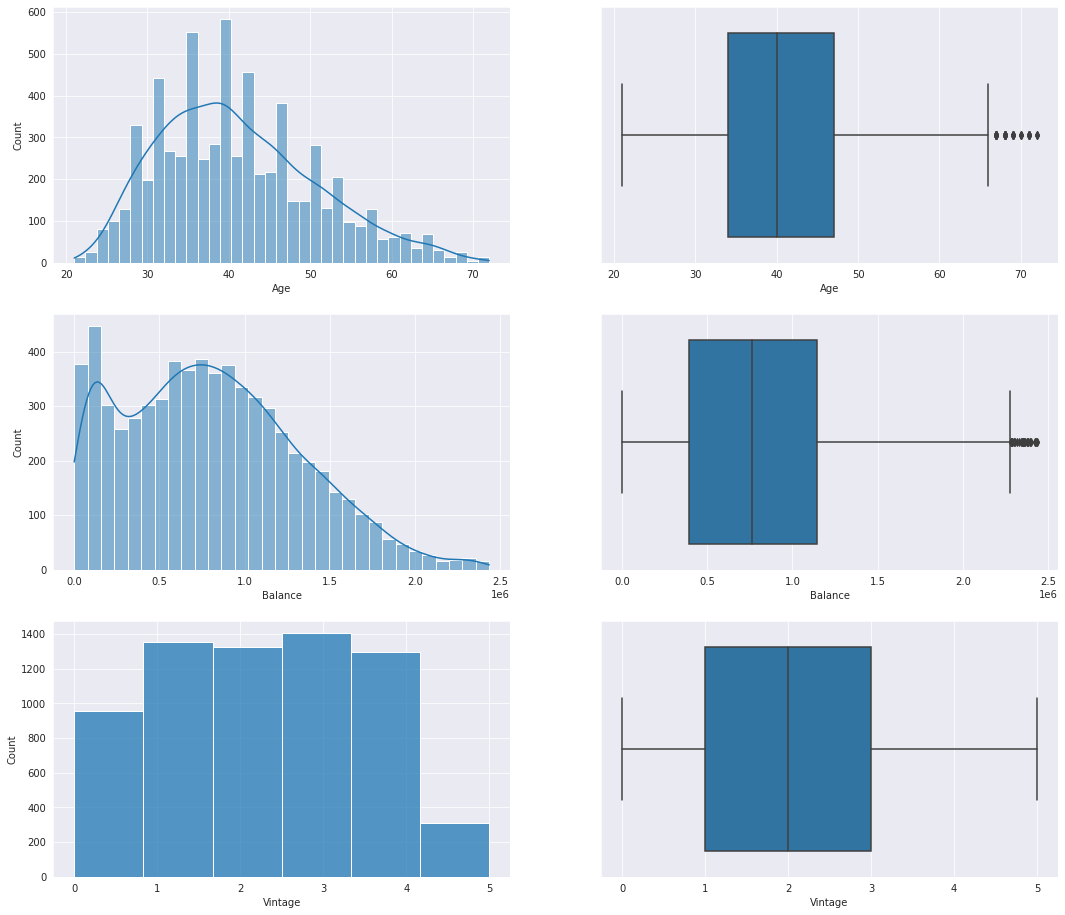

In [ ]:
### plotting histograms & boxplot for both 'Age'& 'Balance' columns
fig, axs = plt.subplots(nrows = 3 , ncols = 2,figsize=(18, 16))
sns.histplot(x= 'Age', data=train_df,kde= True , ax = axs[0,0])
sns.histplot(x= 'Balance', data=train_df, kde=True,ax = axs[1,0])
sns.boxplot (x= 'Age', data=train_df, ax = axs[0,1])
sns.boxplot(x= 'Balance', data=train_df, ax = axs[1,1])
sns.histplot(x= 'Vintage', data=train_df, ax = axs[2,0],bins = 6)
sns.boxplot(x= 'Vintage', data=train_df, ax = axs[2,1])
plt.show()

As we  can see in the plot there are outliers present in both the age and balance columns. And the balance column showing a right skewed distribution.<br>

### Multivariate Analysis



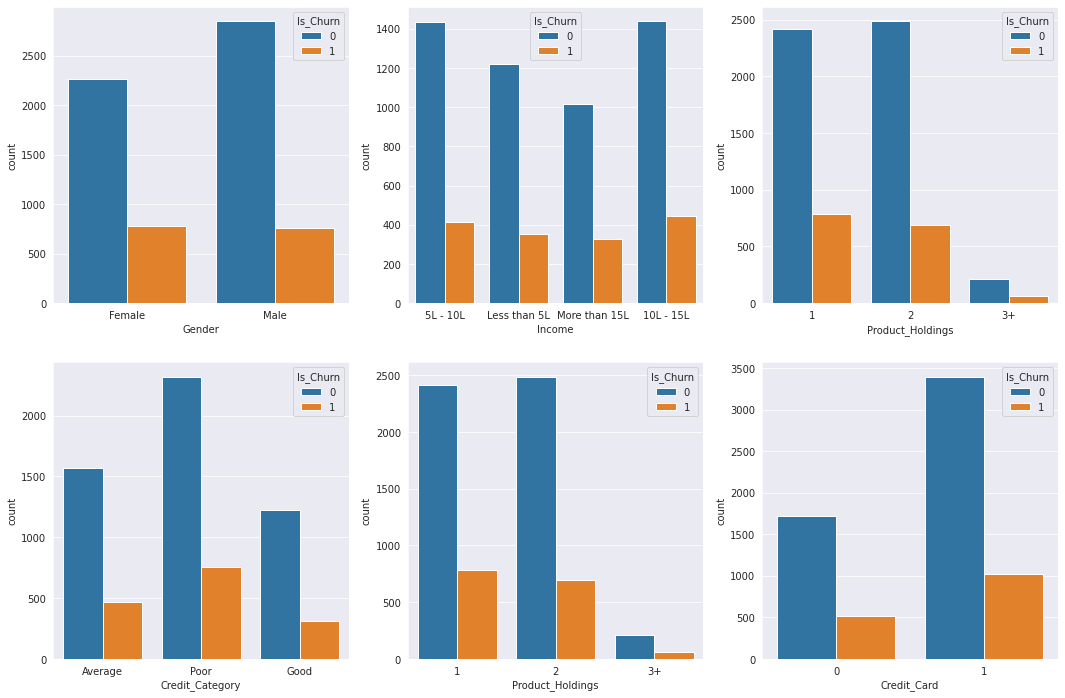

In [ ]:
fig, axs = plt.subplots(nrows = 2 , ncols = 3,figsize=(18, 12))
sns.countplot(x= 'Gender', hue = 'Is_Churn',data=train_df, ax = axs[0,0])
sns.countplot(x= 'Income',hue = 'Is_Churn', data=train_df, ax = axs[0,1])
sns.countplot(x= 'Product_Holdings',hue = 'Is_Churn', data=train_df, ax = axs[0,2])
sns.countplot(x= 'Credit_Category',hue = 'Is_Churn', data=train_df, ax = axs[1,0])
sns.countplot(x= 'Product_Holdings',hue = 'Is_Churn', data=train_df, ax = axs[1,1])
sns.countplot(x= 'Credit_Card',hue = 'Is_Churn', data=train_df, ax = axs[1,2])
plt.show()

1. In both the gender almost equal amount of employees are likely to leave the Bank. 

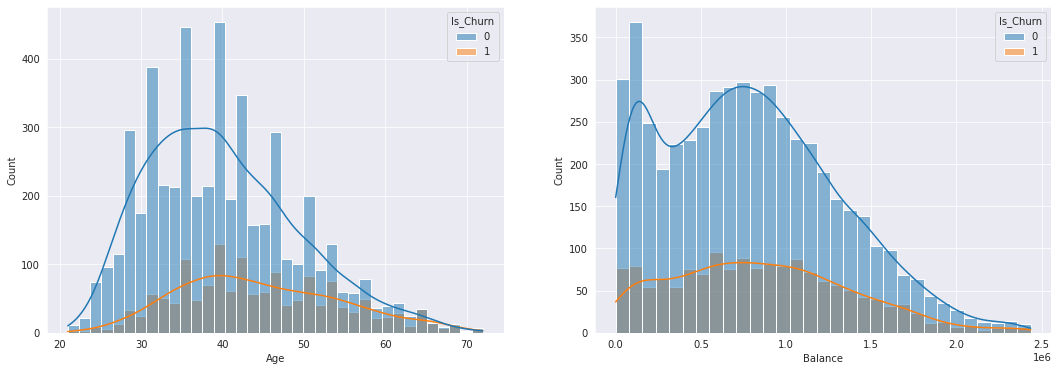

In [ ]:
### plotting histograms & boxplot for both 'Age'& 'Balance' columns
fig, axs = plt.subplots(nrows = 1 , ncols = 2,figsize=(18, 6))
sns.histplot(x= 'Age',hue = 'Is_Churn', data=train_df,kde= True , ax = axs[0])
sns.histplot(x= 'Balance',hue = 'Is_Churn', data=train_df, kde=True,ax = axs[1])
plt.show()

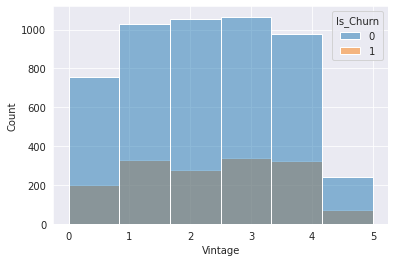

In [ ]:
sns.histplot(x= 'Vintage',hue = 'Is_Churn', data=train_df,bins = 6)

The customers who are in between 30-60 range are more likely to leave the bank

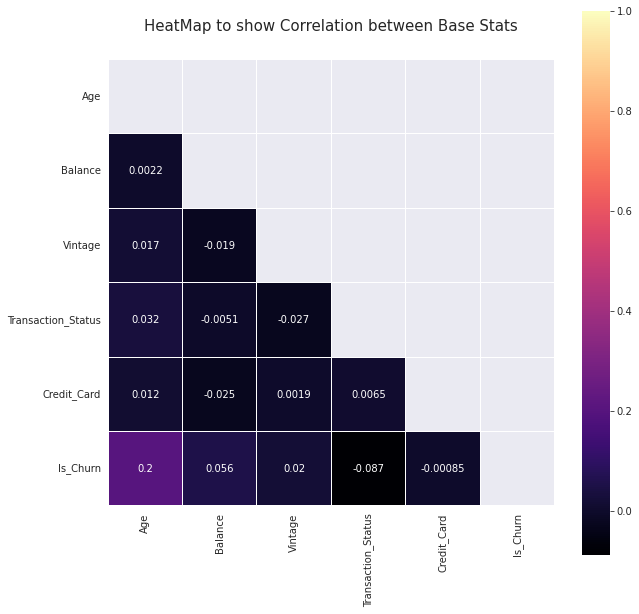

In [ ]:
### correlation between independent varibles
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
Corr = train_df
colormap = plt.cm.magma
plt.title('HeatMap to show Correlation between Base Stats', y=1.05, size=15)
sns.heatmap(Corr.corr(),linewidths=0.1,vmax=1, square=True, cmap=colormap, linecolor='white', annot=True,mask=mask)

### **Outliers Detection & removel**

Both the Age and Balance column contains outliers. In order to remove the outliers & reduce VIF value in the age columns performing the binning for both the train and test dataset

In [ ]:
### Performing binning and converting the age column into 10 discrete buckets
train_df['Age_catagory'] = pd.cut(x=train_df['Age'], bins=[1, 25, 30, 35, 40,45,50,55,60,65,80],
                     labels=['lessthan_25', '26-30','31-35','36-40','41 to 45','46-50','51-55','56-60',
                           '61-65'  ,'greaterthan_66'])

### Performing same actions on test data
test_df['Age_catagory'] = pd.cut(x=test_df['Age'] , bins=[1, 25, 30, 35, 40,45,50,55,60,65,80],
                     labels=['lessthan_25', '26-30','31-35','36-40','41 to 45','46-50','51-55','56-60',
                           '61-65'  ,'greaterthan_66'])

In [ ]:
train_df['Age_catagory'].dtype

CategoricalDtype(categories=['lessthan_25', '26-30', '31-35', '36-40', '41 to 45',
                  '46-50', '51-55', '56-60', '61-65', 'greaterthan_66'],
, ordered=True)

In [ ]:
### converting data type of newly created Age_catagory column
train_df['Age_catagory'] = train_df['Age_catagory'].astype('object')
test_df['Age_catagory']  = test_df['Age_catagory'] .astype('object')

In [ ]:
### Since the values in the balance columns are very high comapred to other columns I am taking the logarithemic values for balance columns
train_df['log_Balance'] = np.log(train_df['Balance'])
test_df['log_Balance'] = np.log(test_df['Balance'])

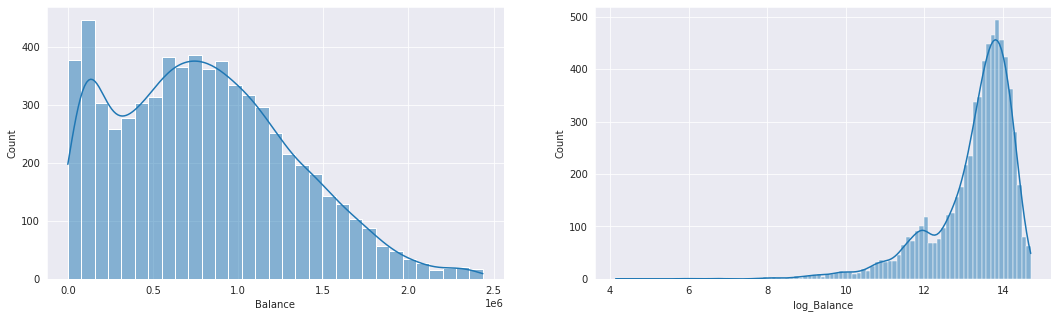

In [ ]:
fig, axs = plt.subplots(ncols = 2,figsize=(18, 5))
sns.histplot(x= 'Balance', data=train_df,kde= True , ax = axs[0])
sns.histplot(x= 'log_Balance', data=train_df, kde=True,ax = axs[1])

Now the values has decreased. But still the outliers are present in the Balance data. So I may have to do scaling in the log_balance feature later.

In [ ]:
train_df.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Age_catagory,log_Balance
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,36-40,13.241508
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,51-55,13.682633
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,31-35,13.461129
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,41 to 45,14.147632
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,36-40,13.702506


Great! Now the values in the balance column has changed into small. 

In [ ]:
### all the columns in this dataset are not useful for training a model. So I am selecting all the columns except 'ID' and 'Is_Churn' in input data 
input_col = [ 'Age_catagory', 'Gender', 'Income', 'log_Balance', 'Vintage','Transaction_Status', 'Product_Holdings', 'Credit_Card','Credit_Category']

### Identifying target column
target_col = 'Is_Churn'

### **Seperating catagorical and numeric data**

In [ ]:
#### Identfying  numerical and categorical columns in the data
numeric_cols = train_df[input_col].select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df[input_col].select_dtypes('object').columns.tolist()

In [ ]:
train_df[categorical_cols].head()

,Age_catagory,Gender,Income,Product_Holdings,Credit_Category
0,36-40,Female,5L - 10L,1,Average
1,51-55,Female,Less than 5L,1,Poor
2,31-35,Female,More than 15L,2,Poor
3,41 to 45,Female,More than 15L,2,Poor
4,36-40,Female,More than 15L,1,Good


In [ ]:
train_df[numeric_cols].head()

,log_Balance,Vintage,Transaction_Status,Credit_Card
0,13.241508,4,0,0
1,13.682633,2,1,1
2,13.461129,2,1,0
3,14.147632,0,1,1
4,13.702506,1,1,1


In [ ]:
### input data 
new_train_df = train_df[input_col]
new_test_df = test_df[input_col]
## target data 
y_train = train_df[target_col]

### **Scaling Numeric Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_train_df[['log_Balance', 'Vintage']])

MinMaxScaler()

In [ ]:
new_train_df[['log_Balance', 'Vintage']] = scaler.transform(new_train_df[['log_Balance', 'Vintage']])
new_test_df[['log_Balance', 'Vintage']] = scaler.transform(new_test_df[['log_Balance', 'Vintage']])

In [ ]:
new_train_df.describe()

,log_Balance,Vintage,Transaction_Status,Credit_Card
count,6650.000000,6650.000000,6650.000000,6650.000000
mean,0.861917,0.450045,0.515789,0.664361
std,0.100342,0.291759,0.499788,0.472249
min,0.000000,0.000000,0.000000,0.000000
25%,0.827091,0.200000,0.000000,0.000000
50%,0.890318,0.400000,1.000000,1.000000
75%,0.928680,0.600000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### **Encoding Categorical Data**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [ ]:
encoder.fit(new_train_df[categorical_cols])

OneHotEncoder(sparse=False)

In [ ]:
encoder.categories_

[array(['26-30', '31-35', '36-40', '41 to 45', '46-50', '51-55', '56-60',
        '61-65', 'greaterthan_66', 'lessthan_25'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['10L - 15L', '5L - 10L', 'Less than 5L', 'More than 15L'],
       dtype=object),
 array(['1', '2', '3+'], dtype=object),
 array(['Average', 'Good', 'Poor'], dtype=object)]

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Age_catagory_26-30', 'Age_catagory_31-35', 'Age_catagory_36-40', 'Age_catagory_41 to 45', 'Age_catagory_46-50', 'Age_catagory_51-55', 'Age_catagory_56-60', 'Age_catagory_61-65', 'Age_catagory_greaterthan_66', 'Age_catagory_lessthan_25', 'Gender_Female', 'Gender_Male', 'Income_10L - 15L', 'Income_5L - 10L', 'Income_Less than 5L', 'Income_More than 15L', 'Product_Holdings_1', 'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Category_Average', 'Credit_Category_Good', 'Credit_Category_Poor']


In [ ]:
new_train_df[encoded_cols] = encoder.transform(new_train_df[categorical_cols])
new_test_df[encoded_cols] = encoder.transform(new_test_df[categorical_cols])

In [ ]:
### droping repeating gender columns
new_train_df[encoded_cols]

,Age_catagory_26-30,Age_catagory_31-35,Age_catagory_36-40,Age_catagory_41 to 45,Age_catagory_46-50,Age_catagory_51-55,Age_catagory_56-60,Age_catagory_61-65,Age_catagory_greaterthan_66,Age_catagory_lessthan_25,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6646,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6647,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train = new_train_df[numeric_cols + encoded_cols].drop('Gender_Female',axis = 1)
X_test = new_test_df[numeric_cols + encoded_cols].drop('Gender_Female',axis = 1)
y_train = train_df[target_col]

In [ ]:
X_train.shape

(6650, 25)

In [ ]:
X_test.shape

(2851, 25)

### **Model Fitting**
### Common function for fitting the model and calculating the accuracy

In [ ]:
### fnction for fitting and checking accracy by KFold cross validation
def modelfit(model, X, y, k, X_test):
    
    ### KFold cross-validation
    kf = model_selection.KFold(n_splits=k, random_state=None)
    result = cross_val_score(model , X, y, cv = kf , scoring='f1_macro')
    
    print("\nModel Results")
    print("CV Score : Mean - %.3g \nStd - %.3g \nMin - %.3g \nMax- %.3g" % (np.mean(result),np.std(result),np.min(result),np.max(result)))
    
    ### Fitting
    model.fit(X, y)
    
    ### Prediction
    Y_pred_train = model.predict(X)
    
    ### Macro F1 score on training data
    macro_f1_score=f1_score(y, Y_pred_train, average='macro')
    print("Training Macro F1 score - %.4g" % macro_f1_score)
        
    ### Predict on testing data:
    Y_pred = model.predict(X_test)
    return Y_pred

### Logistic Regression

In [ ]:
# Logistic Regression with L2 penalty
model_1 = LogisticRegression(random_state=12, penalty='l2', tol=1e-6, C=0.8, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(model_1, X_train, y_train, 20, X_test)


Model Results
CV Score : Mean - 0.585 
Std - 0.031 
Min - 0.537 
Max- 0.635
Training Macro F1 score - 0.5913


### Improving the accuracy of Logistic regression through Feature selection

In [ ]:
###selection of features
features = pd.DataFrame({'features':X_train.columns,'coef':np.abs(model_1.coef_[0])}).sort_values('coef',ascending=False)
features

,features,coef
4,Age_catagory_26-30,1.146909
0,log_Balance,0.998026
13,Age_catagory_lessthan_25,0.927914
12,Age_catagory_greaterthan_66,0.918640
11,Age_catagory_61-65,0.702508
5,Age_catagory_31-35,0.607726
10,Age_catagory_56-60,0.522010
2,Transaction_Status,0.456724
9,Age_catagory_51-55,0.396057
14,Gender_Male,0.261284


In [ ]:
### selecting featuress which  is > 0.02
X_train_updated = X_train[features[features['coef']> 0.02].features]
X_test_updated = X_test[features[features['coef']> 0.02].features]

In [ ]:
# Logistic Regression with L2 penalty
model_1 = LogisticRegression(random_state=12, penalty='l2', tol=1e-6, C=0.92, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(model_1, X_train_updated, y_train, 20, X_test_updated)


Model Results
CV Score : Mean - 0.587 
Std - 0.0321 
Min - 0.533 
Max- 0.641
Training Macro F1 score - 0.5917


In [ ]:
# Logistic Regression with L1 penalty
model_1 = LogisticRegression(random_state=12, penalty='l1', tol=1e-6, C=0.92, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(model_1, X_train_updated, y_train, 20, X_test_updated)


Model Results
CV Score : Mean - 0.585 
Std - 0.0329 
Min - 0.524 
Max- 0.636
Training Macro F1 score - 0.5895
